In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv(r'C:\Users\ganir\iCloudDrive\ML Competitions\MachineHack\MusicGenrePrediction\data\train.csv')

In [5]:
df.head(10)

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.000000,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.000000,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.000000,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.000000,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.000000,4,10
5,The Stooges,Search and Destroy - Iggy Pop Mix,53.0,0.235,0.977,6.0,0.878,1,0.1070,0.003530,0.006040,0.1720,0.2410,152.952,208133.000000,4,6
6,Solomon Burke,None Of Us Are Free,48.0,0.674,0.658,5.0,-9.647,0,0.1040,0.404000,0.000001,0.0981,0.6770,143.292,329387.000000,4,2
7,Randy Travis,On the Other Hand,55.0,0.657,0.415,5.0,-9.915,1,0.0250,0.175000,0.000006,0.1320,0.3470,96.030,3.105783,4,4
8,Professional Murder Music,Slow,29.0,0.431,0.776,10.0,-5.403,1,0.0527,0.000022,0.001300,0.1790,0.3180,120.857,237867.000000,4,8
9,Dudu Aharon,"◊ì◊ï◊ì◊ï, ◊ô◊ê◊ú◊ú◊î ◊ô◊ê◊ú◊ú◊î",14.0,0.716,0.885,1.0,-4.348,0,0.0333,0.061400,NaN,0.2530,0.8330,128.043,164093.000000,4,9


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Popularity,17568.0,44.512124,17.426928,1.000000,33.000000,44.00000,56.00000,100.000
danceability,17996.0,0.543433,0.166268,0.059600,0.432000,0.54500,0.65900,0.989
energy,17996.0,0.662777,0.235373,0.000020,0.509000,0.70000,0.86000,1.000
key,15982.0,5.952447,3.196854,1.000000,3.000000,6.00000,9.00000,11.000
loudness,17996.0,-7.910660,4.049151,-39.952000,-9.538000,-7.01600,-5.18900,1.355
mode,17996.0,0.636753,0.480949,0.000000,0.000000,1.00000,1.00000,1.000
speechiness,17996.0,0.079707,0.083576,0.022500,0.034800,0.04740,0.08300,0.955
acousticness,17996.0,0.247082,0.310632,0.000000,0.004300,0.08140,0.43400,0.996
instrumentalness,13619.0,0.177562,0.304048,0.000001,0.000089,0.00391,0.20000,0.996
liveness,17996.0,0.196170,0.159212,0.011900,0.097500,0.12900,0.25800,1.000


In [7]:
df.isnull().sum()

Artist Name              0
Track Name               0
Popularity             428
danceability             0
energy                   0
key                   2014
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      4377
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                    0
dtype: int64

In [12]:
for i in list(df.select_dtypes(include='object').columns):
    print('Feature name: ', i)
    print(df[i].value_counts(dropna=False))
    print()

Feature name:  Artist Name
Backstreet Boys                69
Westlife                       60
Britney Spears                 54
Omer Adam                      48
Eyal Golan                     48
                               ..
Pole                            1
Dick Dale and his Del-Tones     1
Wynne                           1
Udit Narayan, Hema Sardesai     1
Chilly Gonzales                 1
Name: Artist Name, Length: 9149, dtype: int64

Feature name:  Track Name
Dreams                      9
Fire                        8
Runaway                     8
Ghost                       7
Forever                     7
                           ..
The River Knows How         1
Ae Meri Topi Palat Ke Aa    1
Maux                        1
My Vibe                     1
Cigarette Packet            1
Name: Track Name, Length: 15129, dtype: int64



<AxesSubplot:>

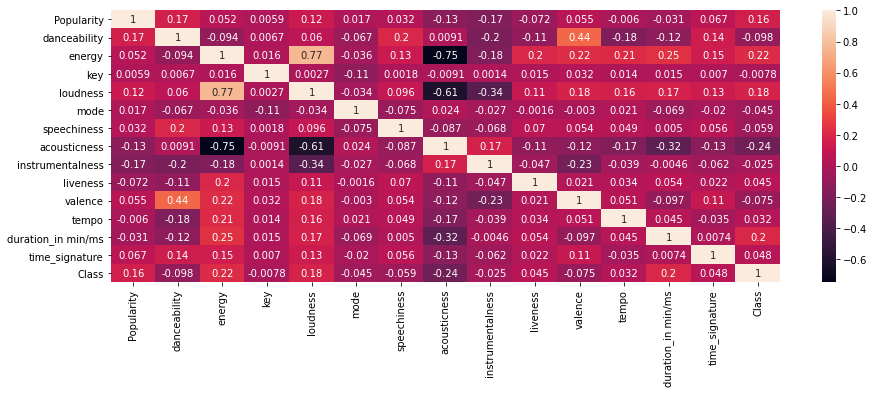

In [16]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(), annot=True)